## Fake News Detection Using NLP 

### Understanding Data

In [1]:
# importing basic libraries
import pandas as pd

In [39]:
# dataset
df = pd.read_csv('C:/Users/Admin/Downloads/train.csv')
df.head(9)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0


In [4]:
# Shape of datasets(Rows,Columns)
df.shape

(20800, 5)

In [16]:
# checking null values
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
# writing na insted of null values
df.dropna(inplace=True)

In [9]:
# now there are no null values 
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
# checking data types 
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [13]:
# changing label datatypes as string
df['label']=df['label'].astype(str)

In [15]:
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

In [17]:
import seaborn as sns
def create_distribution(feature):
    return sns.countplot(df[feature])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

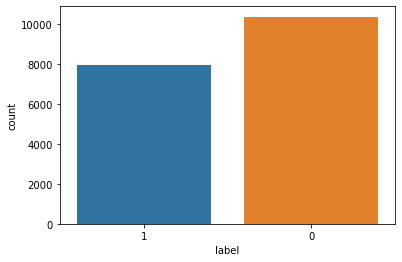

In [18]:
# countplot for label(column)
create_distribution('label')

In [35]:
news=df.copy()
news.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [36]:
#why to reset_index,bcz in above we can check,when we drop our rows get deleted as 6 and 8th so to make it in a order , we have to use reset_index
news.reset_index(inplace=True)
news.head(5)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [37]:
# dropping index and id
news.drop(['index','id'],axis=1,inplace=True)

In [38]:
# dropped
news.head(5)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Stemming

In [48]:
# data in 0th index
# we will consider title for preprocessing
data = news['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [49]:
import re

In [50]:
# accepting a-z , A-Z any other thing replace with space # you can see we dont have any special character in data
re.sub('[^a-zA-z]',' ',data)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [51]:
# lowering is important to find similar words in different sentences
data = data.lower()
data

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [52]:
list=data.split()
list

['house',
 'dem',
 'aide:',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [53]:
# installing natural language toolkit
! pip install nltk

In [65]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [69]:
ps = PorterStemmer()

In [70]:
# method 1
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [71]:
# method 2
review=[]
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word))
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [72]:
# the text data that has to be passed with NLP
' '.join(review)

'hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

In [77]:
corpus=[]
sentences=[]
for i in range(0,len(news)):
    review=re.sub('[^a-zA-Z]',' ', news['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [79]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [81]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [84]:
len(corpus)

18285

### applying Bag of Word to data(BOW) 

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
# i need top 5000 features from this entire vector
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [87]:
X=cv.fit_transform(corpus).toarray()

In [88]:
X.shape

(18285, 5000)

In [89]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Getting top 20 features 

In [92]:
cv.get_feature_names()[0:25]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus']

In [93]:
news.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [94]:
y=news['label']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [106]:
X_test.shape

(4572, 5000)

In [107]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [108]:
classifier.fit(X_train,y_train)

MultinomialNB()

In [110]:
predict = classifier.predict(X_test)
predict

array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [112]:
from sklearn import metrics

metrics.accuracy_score(y_test,predict)

0.8904199475065617

In [115]:
cm = metrics.confusion_matrix(y_test,predict)
cm

array([[2301,  299],
       [ 202, 1770]], dtype=int64)

([<matplotlib.axis.YTick at 0x13087883c70>,
 [Text(0, 0, 'positive'), Text(0, 1, 'negative')])

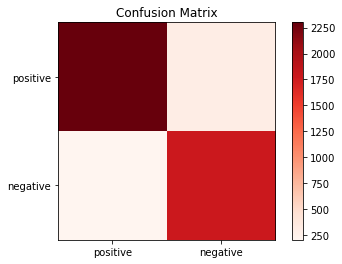

In [125]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Reds)
plt.colorbar()
plt.title('Confusion Matrix')
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)
plt.yticks(tick_marks,labels)

In [128]:
def plot_confusion_matrix(cm):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Reds)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=['positive','negative']
    tick_marks=np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)

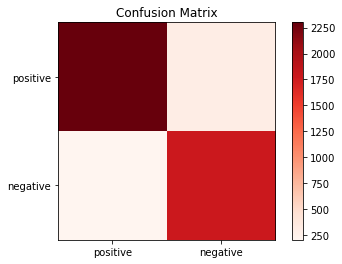

In [129]:
plot_confusion_matrix(cm)

###  passive aggresive classifier algorithm

In [130]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [131]:
linear_clf=PassiveAggressiveClassifier()

In [133]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [134]:
predictions=linear_clf.predict(X_test)

In [135]:
metrics.accuracy_score(y_test,predictions)

0.9114173228346457

In [136]:
cm2=metrics.confusion_matrix(y_test,predictions)
cm2

array([[2360,  240],
       [ 165, 1807]], dtype=int64)

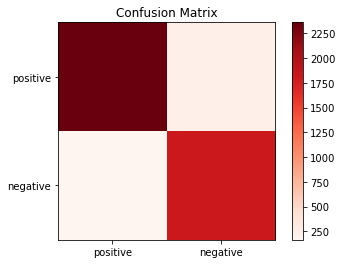

In [137]:
plot_confusion_matrix(cm2)

In [141]:
## Get Features names
#to detect which fake and which is most real word

feature_names=cv.get_feature_names()
feature_names

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbart',
 'agent',
 'aggress',
 '

In [139]:
classifier.coef_

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([[ -8.86060051,  -8.60928608,  -9.19707274, ..., -10.80651066,
         -8.72706912,  -9.4202163 ]])

In [145]:
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[0:20]

[(-3.9648951809317863, 'trump'),
 (-4.272721819476034, 'hillari'),
 (-4.368759007672977, 'clinton'),
 (-4.861090048802803, 'elect'),
 (-5.219261999009128, 'new'),
 (-5.230561554263062, 'comment'),
 (-5.269176390390841, 'video'),
 (-5.355472203843678, 'war'),
 (-5.372788653855138, 'hillari clinton'),
 (-5.394864605554338, 'us'),
 (-5.412883111057016, 'fbi'),
 (-5.483500678270969, 'vote'),
 (-5.483500678270969, 'email'),
 (-5.559486585248892, 'obama'),
 (-5.570068694579429, 'world'),
 (-5.718914322176994, 'donald'),
 (-5.743915624382411, 'donald trump'),
 (-5.8229040357010415, 'russia'),
 (-5.864868234800074, 'presid'),
 (-5.872036724278686, 'america')]